In [17]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

# Messi output

In [18]:
messi_goals = pd.read_csv('../data/cleaned-data/messi_goals.csv')
messi_assists = pd.read_csv('../data/cleaned-data/messi_assists.csv')
messi_goal_involvements = pd.read_csv('../data/cleaned-data/messi_goal_involvement.csv')
messi_chances_created = pd.read_csv('../data/cleaned-data/messi_chances_created.csv')
messi_chances_missed = pd.read_csv('../data/cleaned-data/messi_chances_missed.csv')

In [19]:
messi_goals.head()

,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name,statsbomb_xg,end_location,key_pass_id,technique,outcome,type,body_part,freeze_frame,first_time,aerial_won,deflected,one_on_one,open_goal,redirect
0,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,1176,1,25,9,0.480919,"['2f90af33-d7c8-48aa-b9b5-32a5d5656221', '92ff...","[110.0, 39.5]",1.0,16,Shot,4,From Throw In,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [117.9, 40.2], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN
1,2017/2018,9592,5656d749-a0c6-4469-bdea-a07ab0919ba9,1492,1,34,49,0.667974,['cc083ceb-8f93-4f1f-8745-c9141dfe37f8'],"[116.1, 33.8]",NaN,16,Shot,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,0.178780,"[120.0, 39.6, 0.2]",0c0db095-ab96-4056-b48b-33145397b7fc,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 40, 'name': 'Right Foot'}","[{'location': [112.0, 43.4], 'player': {'id': ...",True,NaN,NaN,NaN,NaN,NaN
2,2017/2018,9592,5f1f5de5-115f-484d-95c4-19fba32feefc,2698,2,66,10,0.689000,['844b5709-2ff4-4d41-9736-7828b73f479f'],"[110.6, 34.3]",NaN,16,Shot,4,From Throw In,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,0.225323,"[120.0, 42.1, 0.5]",aabaa0f4-a0e5-451d-9976-7d98bb813718,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [118.8, 37.1], 'player': {'id': ...",True,NaN,NaN,NaN,NaN,NaN
3,2017/2018,9870,f2a3ea50-13f4-485a-879c-1b93594557a7,1254,1,26,25,1.364345,['e0372702-a66b-4079-a51e-654c0141529c'],"[94.7, 51.6]",NaN,16,Shot,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,19,Center Attacking Midfield,0.053654,"[120.0, 42.4, 0.4]",NaN,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 62, 'name': 'Free Kick'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [104.3, 46.3], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN
4,2017/2018,9870,575e39d9-4dd0-45bd-b63b-76f4386a2c17,1471,1,31,38,1.681951,"['0977479b-ff7c-476c-b5ef-12d63fba6e62', 'fb58...","[106.7, 36.8]",1.0,16,Shot,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,19,Center Attacking Midfield,0.292384,"[120.0, 37.9, 0.1]",991bb12d-a211-4093-81d9-aaf9cd77c122,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [102.7, 31.4], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
messi_assists.head()

,season_name,match_id,id,index,period,minute,second,duration,related_events,location,pass,under_pressure,off_camera,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name
0,2017/2018,9783,cb6ade81-20d4-45f5-ac0b-01da292b825a,2941,2,81,51,1.446,['e74372d2-db3c-421a-82e6-a7ebf953b13f'],"[113.0, 4.0]","{'recipient': {'id': 5213, 'name': 'Gerard Piq...",NaN,NaN,30,Pass,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,17,Right Wing
1,2017/2018,9695,8b4094de-24e4-4006-adde-a95e3fc27dfd,3583,2,81,49,1.660,['59d115c0-ff14-4816-8b5a-86203b713b73'],"[85.0, 49.0]","{'recipient': {'id': 5211, 'name': 'Jordi Alba...",NaN,NaN,30,Pass,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward
2,2017/2018,9650,43e66789-458c-4132-9662-8a242fe523ae,2495,2,55,38,0.518,['de472f78-e25e-494b-9456-735cfab5dca8'],"[97.0, 46.0]","{'recipient': {'id': 5216, 'name': 'Andrés Ini...",NaN,NaN,30,Pass,4,From Throw In,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward
3,2017/2018,9799,a6565dc9-9da3-4bbd-aa34-81c4fc882556,669,1,15,21,2.336,"['a9dea43e-d41f-46b5-ae8e-cd0d98ab17d8', 'fce6...","[70.0, 26.0]","{'recipient': {'id': 5246, 'name': 'Luis Alber...",1.0,NaN,30,Pass,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward
4,2017/2018,9811,6f70fc4c-f0e4-47a2-adac-cdd6cbb0e123,218,1,4,20,1.429,"['2e41869e-b475-4d6f-892e-c069a6ca3539', '6b38...","[71.0, 33.0]","{'recipient': {'id': 5246, 'name': 'Luis Alber...",1.0,NaN,30,Pass,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward


In [21]:
messi_goal_involvements.head()

,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name,statsbomb_xg,end_location,key_pass_id,technique,outcome,type,body_part,freeze_frame,first_time,aerial_won,deflected,one_on_one,open_goal,redirect
0,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,1176,1,25,9,0.480919,"['2f90af33-d7c8-48aa-b9b5-32a5d5656221', '92ff...","[110.0, 39.5]",1.0,16,Shot,4,From Throw In,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [117.9, 40.2], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN
1,2017/2018,9592,5656d749-a0c6-4469-bdea-a07ab0919ba9,1492,1,34,49,0.667974,['cc083ceb-8f93-4f1f-8745-c9141dfe37f8'],"[116.1, 33.8]",NaN,16,Shot,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,0.178780,"[120.0, 39.6, 0.2]",0c0db095-ab96-4056-b48b-33145397b7fc,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 40, 'name': 'Right Foot'}","[{'location': [112.0, 43.4], 'player': {'id': ...",True,NaN,NaN,NaN,NaN,NaN
2,2017/2018,9592,5f1f5de5-115f-484d-95c4-19fba32feefc,2698,2,66,10,0.689000,['844b5709-2ff4-4d41-9736-7828b73f479f'],"[110.6, 34.3]",NaN,16,Shot,4,From Throw In,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,0.225323,"[120.0, 42.1, 0.5]",aabaa0f4-a0e5-451d-9976-7d98bb813718,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [118.8, 37.1], 'player': {'id': ...",True,NaN,NaN,NaN,NaN,NaN
3,2017/2018,9870,f2a3ea50-13f4-485a-879c-1b93594557a7,1254,1,26,25,1.364345,['e0372702-a66b-4079-a51e-654c0141529c'],"[94.7, 51.6]",NaN,16,Shot,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,19,Center Attacking Midfield,0.053654,"[120.0, 42.4, 0.4]",NaN,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 62, 'name': 'Free Kick'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [104.3, 46.3], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN
4,2017/2018,9870,575e39d9-4dd0-45bd-b63b-76f4386a2c17,1471,1,31,38,1.681951,"['0977479b-ff7c-476c-b5ef-12d63fba6e62', 'fb58...","[106.7, 36.8]",1.0,16,Shot,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,19,Center Attacking Midfield,0.292384,"[120.0, 37.9, 0.1]",991bb12d-a211-4093-81d9-aaf9cd77c122,"{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","[{'location': [102.7, 31.4], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
messi_chances_created.head()

,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,off_camera,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name,recipient,length,angle,height,end_location,body_part,type,switch,inswinging,technique,assisted_shot_id,shot_assist,aerial_won,deflected,cross,through_ball,outswinging,cut_back,backheel,straight,no_touch
0,2017/2018,9592,5032f6d4-8e2e-4fc3-a7c6-095d38f8b1b9,1313,1,30,12,0.894,['6bf4b5b8-8f6c-4235-bf00-6915c12aaf26'],"[96.0, 41.0]",NaN,NaN,30,Pass,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,"{'id': 5470, 'name': 'Ivan Rakitić'}",9.219544,-0.218669,"{'id': 1, 'name': 'Ground Pass'}","[105.0, 39.0]","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,NaN,81af3ea9-1754-4b51-9198-880c533d12cb,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017/2018,9592,221ff580-ef55-4b5d-8934-eacf175f9af9,1555,1,38,1,4.132,['90fdc8da-dc74-4b0e-a150-fef17f84e611'],"[52.0, 65.0]",NaN,NaN,30,Pass,7,From Goal Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,"{'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}",63.812225,-0.561922,"{'id': 3, 'name': 'High Pass'}","[106.0, 31.0]","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,NaN,67a15ce6-7672-4da1-8335-e0528d4a259f,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/2018,9592,f15f005b-5410-4c91-b090-edb430ed40c1,2270,2,54,44,0.721,"['2d104d20-6176-43cd-ad26-1234b79f0281', 'e666...","[114.0, 28.0]",1.0,NaN,30,Pass,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,"{'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}",8.062258,1.695151,"{'id': 2, 'name': 'Low Pass'}","[113.0, 36.0]","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,NaN,a1357011-c08f-49f6-9a35-6a7511a9f221,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/2018,9870,21c4d78f-03b4-4de5-a4e0-fbe6f85563aa,941,1,18,59,0.886,['eaf3cdfc-7ad2-4fd2-889f-14e7f93caec5'],"[109.0, 31.0]",NaN,NaN,30,Pass,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,19,Center Attacking Midfield,"{'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}",12.369317,1.325818,"{'id': 1, 'name': 'Ground Pass'}","[112.0, 43.0]","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,NaN,92e3cd86-af58-44e9-8b4b-06dfbeffe874,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017/2018,9700,a3f07f85-fe3e-4f30-a307-b819d1d7eb07,2396,2,47,39,0.646,['ba5b9c7a-5271-4b9f-9a35-fcfb14c22a02'],"[82.0, 42.0]",NaN,NaN,30,Pass,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward,"{'id': 5542, 'name': 'José Paulo Bezzera Macie...",8.000000,0.000000,"{'id': 1, 'name': 'Ground Pass'}","[90.0, 42.0]","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,NaN,407ceb27-434b-4a15-a800-6e3c6a0695dc,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
messi_chances_missed.head()

,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,out,shot,off_camera,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name
0,2017/2018,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,105,1,2,10,1.586764,['7b5721db-31d2-47d1-a1be-a828b972429e'],"[106.0, 57.8]",NaN,NaN,"{'statsbomb_xg': 0.026398562, 'end_location': ...",NaN,16,Shot,2,From Corner,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward
1,2017/2018,9592,076ce5b0-d566-4378-9839-8186ec060da2,1323,1,30,15,0.134000,"['a01eb478-d81a-458d-8418-a1953d616810', 'f32f...","[115.1, 48.4]",NaN,NaN,"{'statsbomb_xg': 0.11316042, 'end_location': [...",NaN,16,Shot,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward
2,2017/2018,9592,c2880ca3-e61a-4a89-8714-4c1fc8dc6620,2171,2,52,22,0.152626,"['34de4dda-541c-4681-b778-1434bc704839', '7619...","[105.2, 36.8]",1.0,NaN,"{'statsbomb_xg': 0.08470476, 'end_location': [...",NaN,16,Shot,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward
3,2017/2018,9592,a34b794b-1560-45ee-9e80-5eb76019c2c3,3249,2,82,29,0.905512,"['2b1b12cd-c390-4a47-b739-8ab8d17bd250', '3a40...","[102.7, 37.2]",1.0,NaN,"{'statsbomb_xg': 0.09698626, 'end_location': [...",NaN,16,Shot,1,Regular Play,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward
4,2017/2018,9592,c77baa89-bfd3-40d1-94e4-1c14ba14d209,3331,2,85,39,0.397538,"['a7c75603-70d8-4460-b0f8-ca182f126c21', 'e35b...","[93.7, 54.1]",NaN,NaN,"{'statsbomb_xg': 0.057982504000000004, 'end_lo...",NaN,16,Shot,3,From Free Kick,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,22,Right Center Forward


In [24]:
goals_per_season = messi_goals.groupby('season_name', as_index=False).nunique().drop([0, 15], axis=0).reset_index()
goals_per_season

,level_0,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name,statsbomb_xg,end_location,key_pass_id,technique,outcome,type,body_part,freeze_frame,first_time,aerial_won,deflected,one_on_one,open_goal,redirect
0,1,2005/2006,5,6,6,1,5,6,6,6,6,1,1,1,2,2,1,1,1,1,2,2,6,6,3,2,1,1,2,6,1,0,0,0,1,0
1,2,2006/2007,9,14,14,2,14,12,14,14,14,0,1,1,3,3,1,1,1,1,2,2,14,14,10,3,1,1,3,14,1,0,0,1,1,0
2,3,2007/2008,8,10,10,2,10,9,10,10,9,0,1,1,5,5,1,1,1,1,3,3,7,10,6,2,1,2,1,6,1,0,0,1,0,0
3,4,2008/2009,18,23,23,2,20,19,23,23,23,1,1,1,8,8,1,1,1,1,2,2,21,22,11,4,1,3,3,20,1,0,1,0,1,0
4,5,2009/2010,20,34,34,2,28,25,34,34,34,1,1,1,6,6,1,1,1,1,4,4,34,34,29,3,1,3,3,33,1,0,1,1,1,0
5,6,2010/2011,20,31,31,2,27,27,31,31,30,1,1,1,7,7,1,1,1,1,4,4,28,31,17,4,1,3,3,27,1,0,1,1,1,0
6,7,2011/2012,25,50,50,2,39,34,50,50,44,1,1,1,8,8,1,1,1,1,4,4,41,47,29,4,1,3,3,42,1,0,1,1,1,1
7,8,2012/2013,27,46,46,2,35,32,46,46,46,1,1,1,7,7,1,1,1,1,3,3,43,45,32,3,1,3,2,42,1,0,1,1,1,0
8,9,2013/2014,18,28,28,2,26,24,28,28,27,1,1,1,7,7,1,1,1,1,1,1,23,28,18,4,1,3,3,23,1,0,0,1,1,0
9,10,2014/2015,25,43,43,2,35,29,43,43,42,1,1,1,9,9,1,1,1,1,3,3,39,43,25,4,1,3,3,38,1,0,1,1,1,0


In [25]:
assists_per_season = messi_assists.groupby('season_name', as_index=False).nunique().drop([14], axis=0).reset_index()
assists_per_season

,level_0,season_name,match_id,id,index,period,minute,second,duration,related_events,location,pass,under_pressure,off_camera,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name
0,0,2005/2006,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
1,1,2006/2007,2,2,2,2,2,2,2,2,2,2,0,0,1,1,2,2,1,1,1,1,2,2
2,2,2007/2008,9,12,11,2,11,12,12,12,12,12,1,1,1,1,4,4,1,1,1,1,4,4
3,3,2008/2009,8,11,10,2,11,11,11,11,11,11,1,0,1,1,4,4,1,1,1,1,1,1
4,4,2009/2010,10,10,10,2,10,10,10,10,10,10,1,0,1,1,4,4,1,1,1,1,3,3
5,5,2010/2011,14,18,18,2,17,18,18,18,17,18,1,0,1,1,5,5,1,1,1,1,3,3
6,6,2011/2012,12,16,16,2,14,14,16,16,16,16,1,0,1,1,5,5,1,1,1,1,3,3
7,7,2012/2013,8,10,10,2,10,10,10,10,10,10,1,0,1,1,6,6,1,1,1,1,2,2
8,8,2013/2014,11,11,11,2,9,10,11,11,11,11,1,0,1,1,6,6,1,1,1,1,1,1
9,9,2014/2015,12,17,17,2,17,15,17,17,17,17,1,0,1,1,6,6,1,1,1,1,3,3


Text(0.5, 1.0, 'Messi goal involvement')

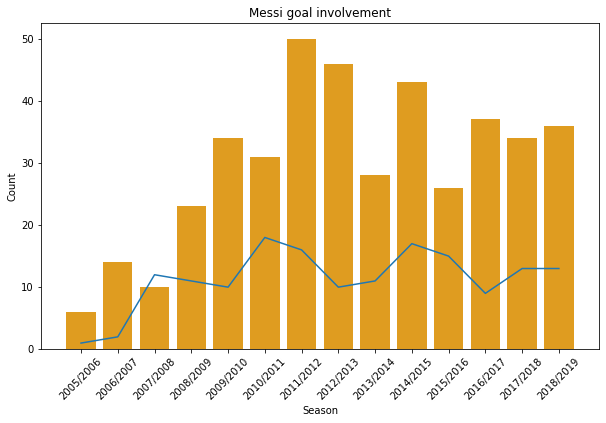

In [26]:
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(data=goals_per_season, x='season_name', y='id', color='orange')
sns.lineplot(data=assists_per_season, x='season_name', y='id')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Messi goal involvement')

Text(0.5, 1.0, 'Messi goals')

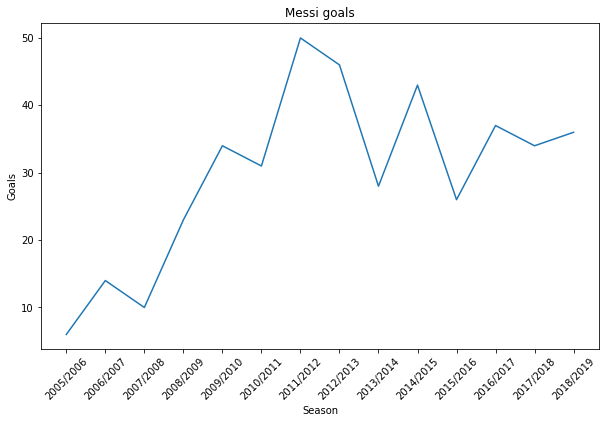

In [27]:
fig, ax = plt.subplots(figsize = (10,6))

sns.lineplot(data=goals_per_season, x='season_name', y='id')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Messi goals')

Text(0.5, 1.0, 'Messi assists')

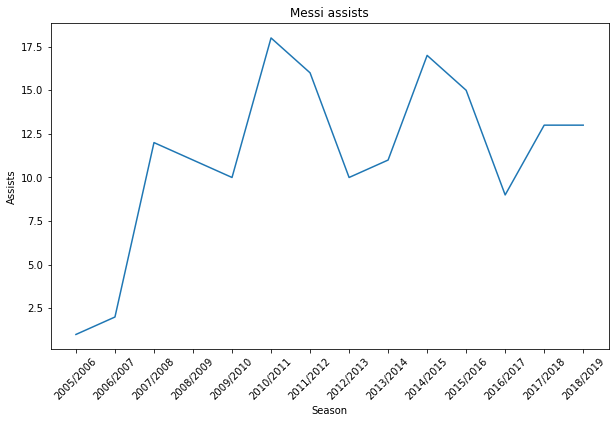

In [28]:
fig, ax = plt.subplots(figsize = (10,6))

sns.lineplot(data=assists_per_season, x='season_name', y='id')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Assists')
plt.title('Messi assists')

In [29]:
chances_created_per_season = messi_chances_created.groupby('season_name', as_index=False).nunique().drop([0, 15], axis=0).reset_index()
chances_created_per_season

,level_0,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,off_camera,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name,recipient,length,angle,height,end_location,body_part,type,switch,inswinging,technique,assisted_shot_id,shot_assist,aerial_won,deflected,cross,through_ball,outswinging,cut_back,backheel,straight,no_touch
0,1,2005/2006,6,12,12,2,12,12,12,12,12,1,0,1,1,5,5,1,1,1,1,2,2,8,12,12,2,12,2,0,0,0,1,12,1,0,0,0,1,0,0,0,0,0
1,2,2006/2007,18,35,34,2,30,26,35,35,35,1,0,1,1,7,7,1,1,1,1,5,5,8,35,35,3,35,2,1,0,0,1,35,1,0,1,1,1,0,1,0,0,0
2,3,2007/2008,17,28,28,2,24,24,28,28,28,1,0,1,1,7,7,1,1,1,1,3,3,11,28,28,3,28,3,0,1,0,1,28,1,0,0,1,1,0,0,0,0,0
3,4,2008/2009,26,57,57,2,42,36,57,57,57,1,0,1,1,8,8,1,1,1,1,2,2,10,57,57,3,57,2,3,1,1,2,57,1,0,0,1,1,0,0,0,0,0
4,5,2009/2010,26,49,49,2,37,30,49,49,47,1,1,1,1,8,8,1,1,1,1,5,5,13,49,49,3,49,2,2,1,1,3,49,1,0,0,1,1,1,0,0,0,0
5,6,2010/2011,26,49,49,2,41,37,49,49,49,1,0,1,1,6,6,1,1,1,1,3,3,13,49,49,3,49,4,2,1,0,2,49,1,0,0,1,1,1,1,0,0,0
6,7,2011/2012,31,74,74,2,54,43,74,74,71,1,0,1,1,5,5,1,1,1,1,4,4,16,74,74,3,74,2,3,1,0,2,74,1,0,0,1,1,1,1,0,0,0
7,8,2012/2013,24,37,37,2,33,25,37,37,36,1,0,1,1,7,7,1,1,1,1,3,3,10,37,37,3,37,2,2,1,0,2,37,1,0,0,1,1,1,1,0,0,0
8,9,2013/2014,26,60,60,2,44,37,59,60,59,1,1,1,1,7,7,1,1,1,1,3,3,14,60,60,3,60,3,3,1,1,3,60,1,0,0,1,1,1,1,0,0,0
9,10,2014/2015,33,68,67,2,51,43,68,68,67,1,0,1,1,8,8,1,1,1,1,4,4,16,68,68,3,68,3,2,1,0,2,68,1,0,0,1,1,1,1,0,0,0


In [30]:
chances_missed_per_season = messi_chances_missed.groupby('season_name', as_index=False).nunique().drop([0, 15], axis=0).reset_index()
chances_missed_per_season

,level_0,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,out,shot,off_camera,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name
0,1,2005/2006,15,32,32,2,29,26,32,32,32,1,1,32,0,1,1,6,6,1,1,1,1,3,3
1,2,2006/2007,24,49,49,2,35,35,49,49,49,1,1,49,0,1,1,8,8,1,1,1,1,3,3
2,3,2007/2008,22,59,58,2,41,36,59,59,59,1,0,59,0,1,1,7,7,1,1,1,1,4,4
3,4,2008/2009,29,88,86,2,62,48,88,88,88,1,1,88,0,1,1,7,7,1,1,1,1,4,4
4,5,2009/2010,34,127,126,2,70,53,127,127,127,1,1,127,1,1,1,8,8,1,1,1,1,5,5
5,6,2010/2011,32,115,113,2,65,51,115,115,115,1,1,115,0,1,1,7,7,1,1,1,1,4,4
6,7,2011/2012,36,148,144,2,73,58,147,148,148,1,1,148,1,1,1,8,8,1,1,1,1,5,5
7,8,2012/2013,30,112,111,2,61,51,112,112,112,1,0,112,0,1,1,7,7,1,1,1,1,3,3
8,9,2013/2014,29,134,131,2,73,56,134,134,134,1,1,134,1,1,1,9,9,1,1,1,1,3,3
9,10,2014/2015,38,143,141,2,73,56,141,143,143,1,1,143,0,1,1,9,9,1,1,1,1,4,4


In [31]:
columns_wanted = [goals_per_season[['season_name', 'id']], assists_per_season['id'], chances_created_per_season['id'], chances_missed_per_season['id']]
headers = ['season', 'goals', 'assists', 'chances_created', 'chances_missed']
season_by_season_output = pd.concat(columns_wanted, axis=1)
season_by_season_output.columns=headers
season_by_season_output

,season,goals,assists,chances_created,chances_missed
0,2005/2006,6,1,12,32
1,2006/2007,14,2,35,49
2,2007/2008,10,12,28,59
3,2008/2009,23,11,57,88
4,2009/2010,34,10,49,127
5,2010/2011,31,18,49,115
6,2011/2012,50,16,74,148
7,2012/2013,46,10,37,112
8,2013/2014,28,11,60,134
9,2014/2015,43,17,68,143


In [32]:
season_by_season_output['goal_involvements'] = season_by_season_output['goals'] + season_by_season_output['assists']

In [33]:
season_by_season_output

,season,goals,assists,chances_created,chances_missed,goal_involvements
0,2005/2006,6,1,12,32,7
1,2006/2007,14,2,35,49,16
2,2007/2008,10,12,28,59,22
3,2008/2009,23,11,57,88,34
4,2009/2010,34,10,49,127,44
5,2010/2011,31,18,49,115,49
6,2011/2012,50,16,74,148,66
7,2012/2013,46,10,37,112,56
8,2013/2014,28,11,60,134,39
9,2014/2015,43,17,68,143,60


Text(0.5, 1.0, 'Messi goal involvements')

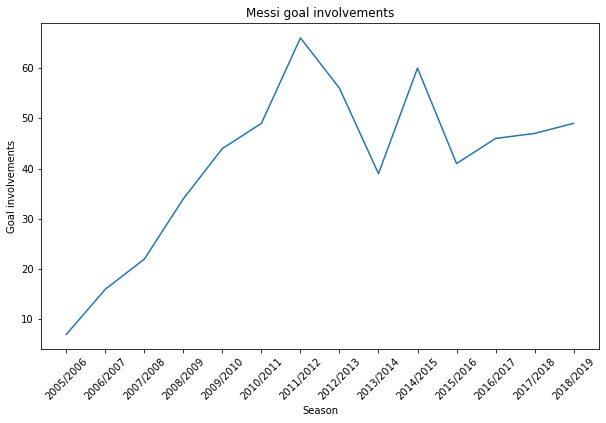

In [34]:
fig, ax = plt.subplots(figsize = (10,6))

sns.lineplot(data=season_by_season_output, x='season', y='goal_involvements')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements')
plt.title('Messi goal involvements')

### Look at upward trend from 2005/06 to 2011/12

In [35]:
upward_trend = season_by_season_output[:7]
upward_trend

,season,goals,assists,chances_created,chances_missed,goal_involvements
0,2005/2006,6,1,12,32,7
1,2006/2007,14,2,35,49,16
2,2007/2008,10,12,28,59,22
3,2008/2009,23,11,57,88,34
4,2009/2010,34,10,49,127,44
5,2010/2011,31,18,49,115,49
6,2011/2012,50,16,74,148,66


Text(0.5, 1.0, 'Messi goal involvements 2005/06-2011/12')

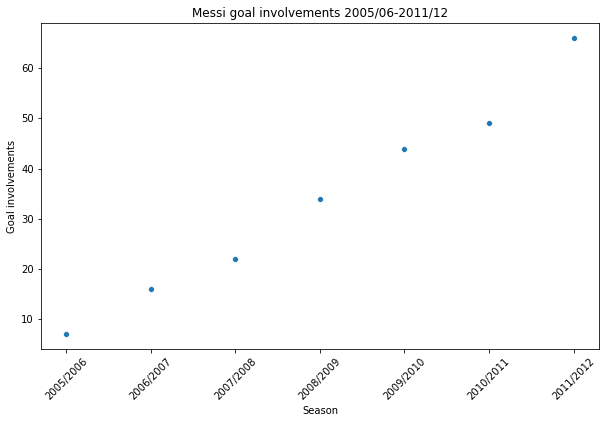

In [36]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=upward_trend, x='season', y='goal_involvements')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements')
plt.title('Messi goal involvements 2005/06-2011/12')

In [37]:
upward_trend = upward_trend.assign(t=range(1, len(upward_trend)+1))

In [38]:
upward_trend = sm.add_constant(upward_trend)

In [39]:
y_up=upward_trend['goal_involvements']
X_up=upward_trend[['const', 't']]

lin_reg = sm.OLS(y_up,X_up)
results = lin_reg.fit()
results.summary()

C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      goal_involvements   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     330.3
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           9.27e-06
Time:                        21:40:31   Log-Likelihood:                -15.850
No. Observations:                   7   AIC:                             35.70
Df Residuals:                       5   BIC:                             35.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8571      2.329     -1.656      0.159      -9.844       2.129
t              9.4643      0.521     18.175      0.000       8.126      10.803
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.519
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.289
Skew:                          -0.298   Prob(JB):                        0.865
Kurtosis:                       2.202   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
predicted_goal_involvements_up = results.predict(X_up)
upward_trend = upward_trend.assign(predicted_goal_involvements = predicted_goal_involvements_up)

In [41]:
upward_trend

,const,season,goals,assists,chances_created,chances_missed,goal_involvements,t,predicted_goal_involvements
0,1.0,2005/2006,6,1,12,32,7,1,5.607143
1,1.0,2006/2007,14,2,35,49,16,2,15.071429
2,1.0,2007/2008,10,12,28,59,22,3,24.535714
3,1.0,2008/2009,23,11,57,88,34,4,34.000000
4,1.0,2009/2010,34,10,49,127,44,5,43.464286
5,1.0,2010/2011,31,18,49,115,49,6,52.928571
6,1.0,2011/2012,50,16,74,148,66,7,62.392857


Text(0.5, 1.0, 'Messi goal involvements 2005/06-2011/12')

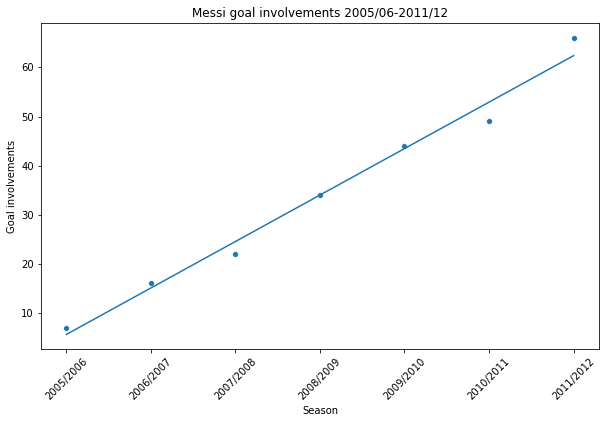

In [42]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=upward_trend, x='season', y='goal_involvements')
sns.lineplot(data=upward_trend, x='season', y='predicted_goal_involvements')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements')
plt.title('Messi goal involvements 2005/06-2011/12')

### Look at downward trend from 2011/12 to 2018/19

In [43]:
downward_trend = season_by_season_output[6:]
downward_trend

,season,goals,assists,chances_created,chances_missed,goal_involvements
6,2011/2012,50,16,74,148,66
7,2012/2013,46,10,37,112,56
8,2013/2014,28,11,60,134,39
9,2014/2015,43,17,68,143,60
10,2015/2016,26,15,59,132,41
11,2016/2017,37,9,67,140,46
12,2017/2018,34,13,71,164,47
13,2018/2019,36,13,78,136,49


Text(0.5, 1.0, 'Messi goal involvements 2005/06-2011/12')

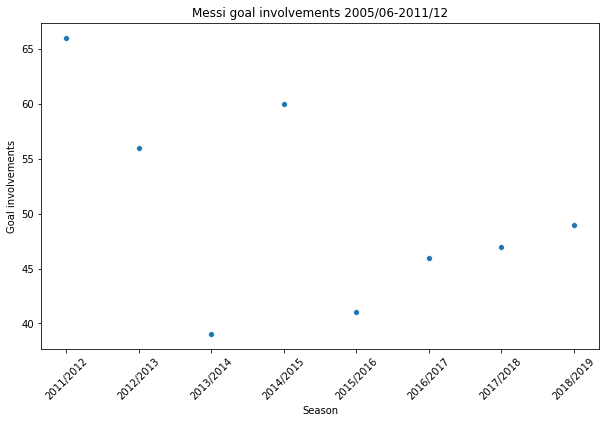

In [44]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=downward_trend, x='season', y='goal_involvements')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements')
plt.title('Messi goal involvements 2005/06-2011/12')

In [45]:
downward_trend = downward_trend.assign(t=range(1, len(downward_trend)+1))

In [46]:
downward_trend = sm.add_constant(downward_trend)

In [47]:
y_down=downward_trend['goal_involvements']
X_down=downward_trend[['const', 't']]

lin_reg = sm.OLS(y_down,X_down)
results = lin_reg.fit()
results.summary()

C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      goal_involvements   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.030
Date:                Wed, 07 Oct 2020   Prob (F-statistic):              0.204
Time:                        21:42:54   Log-Likelihood:                -27.574
No. Observations:                   8   AIC:                             59.15
Df Residuals:                       6   BIC:                             59.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1786      6.836      8.657      0.000      42.452      75.905
t             -1.9286      1.354     -1.425      0.204      -5.241       1.384
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   2.558
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.693
Skew:                          -0.618   Prob(JB):                        0.707
Kurtosis:                       2.257   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
predicted_goal_involvements_down = results.predict(X_down)
downward_trend = downward_trend.assign(predicted_goal_involvements = predicted_goal_involvements_down)

Text(0.5, 1.0, 'Messi goal involvements 2005/06-2011/12')

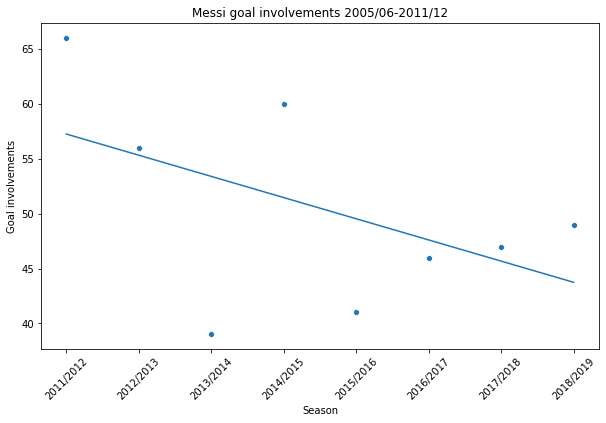

In [49]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=downward_trend, x='season', y='goal_involvements')
sns.lineplot(data=downward_trend, x='season', y='predicted_goal_involvements')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements')
plt.title('Messi goal involvements 2005/06-2011/12')

In [50]:
#Look at 'returns per game' to improve accuracy and allowing for seasons with significant injuries

In [51]:
messi_starts = pd.read_csv('../data/cleaned-data/messi_starts.csv')
messi_starts

,match_id,season_id,match_week,match_date,kick_off,home_score,away_score,home_team_id,home_team_name,away_team_id,away_team_name,stadium_id,stadium_name,referee_id,referee_name,Adriano Correia Claro,Aleix Vidal Parreu,Alexandre Dimitri Song-Billong,Alexis Alejandro Sánchez Sánchez,Aliaksandr Hleb,Anderson Luís de Souza,Andreu Fontàs Prat,André Filipe Tavares Gomes,Andrés Iniesta Luján,Anssumane Fati,Antoine Griezmann,Arda Turan,Arthur Henrique Ramos de Oliveira Melo,Arturo Erasmo Vidal Pardo,Bojan Krkíc Pérez,Carles Aleña Castillo,Carles Puyol i Saforcada,Carles Pérez Sayol,Claudio Andrés Bravo Muñoz,Clément Lenglet,Cristian Tello Herrera,Damià Abella Pérez,Daniel Alves da Silva,David Villa Sánchez,Denis Suárez Fernández,Dmytro Chygrynskiy,Douglas Pereira dos Santos,Eiður Smári Guðjohnsen,Eric-Sylvain Bilal Abidal,Francesc Fàbregas i Soler,Francisco Alcácer García,Frenkie de Jong,Gabriel Alejandro Milito,Gabriel Francisco García de la Torre,Gerard Deulofeu Lázaro,Gerard Piqué Bernabéu,Gianluca Zambrotta,Giovani dos Santos Ramírez,Giovanni van Bronckhorst,Gnégnéri Yaya Touré,Henrik Larsson,Héctor Junior Firpo Adames,Ibrahim Afellay,Ivan Rakitić,Jasper Cillessen,Javier Alejandro Mascherano,Javier Pedro Saviola Fernández,Jean-Clair Todibo,Jeffren Isaac Suárez Bermúdez,Jonathan dos Santos Ramírez,Jordi Alba Ramos,Jordi Masip López,José Edmílson Gomes de Moraes,José Manuel Pinto Colorado,José Martín Cáceres Silva,José Paulo Bezzera Maciel Júnior,Juan Isaac Cuenca López,Juliano Haus Belletti,Jérémy Mathieu,Kevin-Prince Boateng,Lilian Thuram,Lionel Andrés Messi Cuccittini,Lucas Digne,Ludovic Giuly,Luis Alberto Suárez Díaz,Malcom Filipe Silva de Oliveira,Marc Bartra Aregall,Marc-André ter Stegen,Mark van Bommel,Marlon Santos da Silva Barbosa,Martin Braithwaite Christensen,Martín Montoya Torralbo,Maximiliano Gastón López,Maxwell Scherrer Cabelino Andrade,Moussa Wagué,Munir El Haddadi Mohamed,Neymar da Silva Santos Junior,Norberto Murara Neto,Nélson Cabral Semedo,Oleguer Presas Renom,Ousmane Dembélé,Pedro Eliezer Rodríguez Ledesma,Philippe Coutinho Correia,Rafael Alcântara do Nascimento,Rafael Márquez Álvarez,Ricard Puig Martí,Ronald Federico Araújo da Silva,Ronaldo de Assis Moreira,Rubén Iván Martínez Andrade,"Samuel Eto""o Fils",Samuel Yves Umtiti,Sandro Ramírez Castillo,Santiago Ezquerro Marín,Sergi Roberto Carnicer,Sergio Busquets i Burgos,Seydou Kéita,Sylvio Mendes Campos Junior,Thiago Alcântara do Nascimento,Thiago Motta,Thierry Henry,Thomas Vermaelen,Víctor Valdés Arribas,Xavier Hernández Creus,Yerry Fernando Mina González,Zlatan Ibrahimović,barcelona_win,barcelona_loss
0,11,1,11,11,4,5,4,6,6,7,7,6,6,10,10,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,2,1,2,1,1,1,2,1,1,2,2
1,23,1,23,23,4,4,7,13,13,12,12,13,13,16,16,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,2,1,2,1,1,1,2,1,1,2,1
2,23,1,23,23,5,7,6,13,13,12,12,13,13,15,15,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,1,1,1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,2,1,1,2,1,2,2,1,1,2,2
3,27,1,27,27,6,7,6,14,14,15,15,14,14,18,18,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2,2,2,1,1,2,1,1,2,1,1,2,2
4,30,1,30,30,4,7,6,17,17,15,15,17,17,15,15,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,2,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,1,1,2,1,2,2,1
5,31,1,31,31,6,6,7,17,17,16,16,17,17,14,14,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,

In [52]:
#Add 'no_of_starts' column to 'season_by_season_output' dataframe
season_by_season_output = season_by_season_output.assign(no_of_starts = messi_starts['match_id'])
season_by_season_output = season_by_season_output.assign(involvements_per_start = season_by_season_output['goal_involvements']/season_by_season_output['no_of_starts'])
season_by_season_output

,season,goals,assists,chances_created,chances_missed,goal_involvements,no_of_starts,involvements_per_start
0,2005/2006,6,1,12,32,7,11,0.636364
1,2006/2007,14,2,35,49,16,23,0.695652
2,2007/2008,10,12,28,59,22,23,0.956522
3,2008/2009,23,11,57,88,34,27,1.259259
4,2009/2010,34,10,49,127,44,30,1.466667
5,2010/2011,31,18,49,115,49,31,1.580645
6,2011/2012,50,16,74,148,66,36,1.833333
7,2012/2013,46,10,37,112,56,28,2.000000
8,2013/2014,28,11,60,134,39,29,1.344828
9,2014/2015,43,17,68,143,60,37,1.621622


Text(0.5, 1.0, 'Messi goal involvements per start')

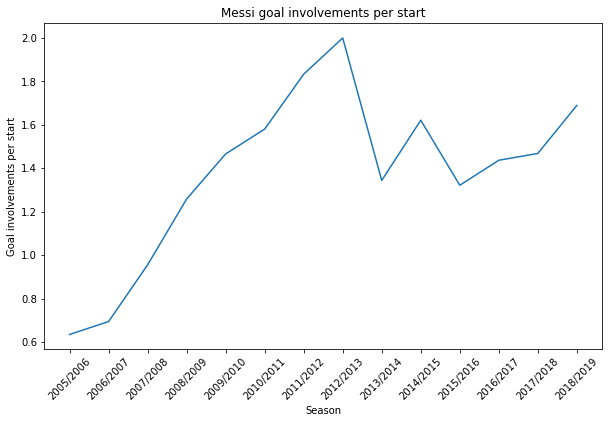

In [53]:
fig, ax = plt.subplots(figsize = (10,6))

sns.lineplot(data=season_by_season_output, x='season', y='involvements_per_start')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements per start')
plt.title('Messi goal involvements per start')

# Re-train model using 'involvements_per_start' variable

### Upward trend

Text(0.5, 1.0, 'Messi goal involvements per start 2005/06-2011/12')

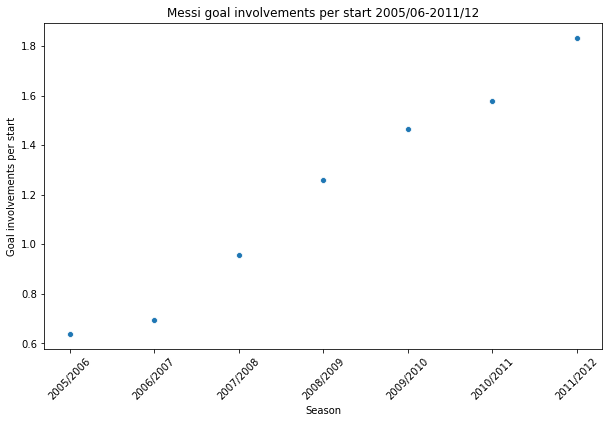

In [54]:
upward_trend_acc = season_by_season_output[:7]

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=upward_trend_acc, x='season', y='involvements_per_start')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements per start')
plt.title('Messi goal involvements per start 2005/06-2011/12')

In [55]:
upward_trend_acc = upward_trend_acc.assign(t=range(1, len(upward_trend_acc)+1))

upward_trend_acc = sm.add_constant(upward_trend_acc)

y_up=upward_trend_acc['involvements_per_start']
X_up=upward_trend_acc[['const', 't']]

lin_reg = sm.OLS(y_up,X_up)
results = lin_reg.fit()
results.summary()

C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     involvements_per_start   R-squared:                       0.983
Model:                                OLS   Adj. R-squared:                  0.980
Method:                     Least Squares   F-statistic:                     295.9
Date:                    Wed, 07 Oct 2020   Prob (F-statistic):           1.22e-05
Time:                            21:44:53   Log-Likelihood:                 10.432
No. Observations:                       7   AIC:                            -16.86
Df Residuals:                           5   BIC:                            -16.97
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3653      0.055      6.702      0.001       0.225       0.505
t              0.2097      0.012     17.201      0.000       0.178       0.241
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.159
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.640
Skew:                          -0.257   Prob(JB):                        0.726
Kurtosis:                       1.611   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#R-Squared is actually lower - WEIRD!

Text(0.5, 1.0, 'Messi goal involvements per start 2005/06-2011/12')

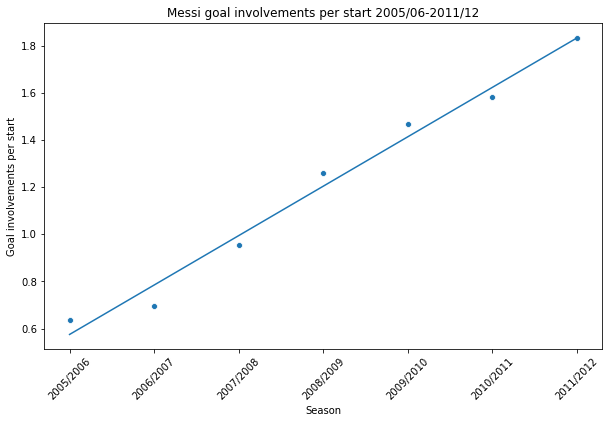

In [57]:
predicted_goal_involvements_per_start_up = results.predict(X_up)
upward_trend_acc = upward_trend_acc.assign(predicted_goal_involvements_per_start = predicted_goal_involvements_per_start_up)

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=upward_trend_acc, x='season', y='involvements_per_start')
sns.lineplot(data=upward_trend_acc, x='season', y='predicted_goal_involvements_per_start')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements per start')
plt.title('Messi goal involvements per start 2005/06-2011/12')

### Downward trend

Text(0.5, 1.0, 'Messi goal involvements per start 2011/12-2018/19')

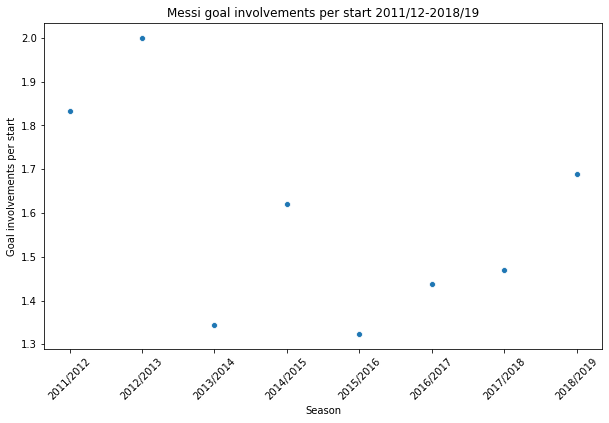

In [58]:
downward_trend_acc = season_by_season_output[6:]

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=downward_trend_acc, x='season', y='involvements_per_start')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements per start')
plt.title('Messi goal involvements per start 2011/12-2018/19')

In [59]:
downward_trend_acc = downward_trend_acc.assign(t=range(1, len(downward_trend_acc)+1))

downward_trend_acc = sm.add_constant(downward_trend_acc)

y_down=downward_trend_acc['involvements_per_start']
X_down=downward_trend_acc[['const', 't']]
lin_reg = sm.OLS(y_down,X_down)
results = lin_reg.fit()
results.summary()

C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     involvements_per_start   R-squared:                       0.198
Model:                                OLS   Adj. R-squared:                  0.064
Method:                     Least Squares   F-statistic:                     1.481
Date:                    Wed, 07 Oct 2020   Prob (F-statistic):              0.269
Time:                            21:45:12   Log-Likelihood:                 1.4365
No. Observations:                       8   AIC:                             1.127
Df Residuals:                           6   BIC:                             1.286
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7871      0.182      9.823      0.000       1.342       2.232
t             -0.0438      0.036     -1.217      0.269      -0.132       0.044
==============================================================================
Omnibus:                        0.315   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.407
Skew:                          -0.019   Prob(JB):                        0.816
Kurtosis:                       1.895   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Messi goal involvements per start 2011/12-2018/19')

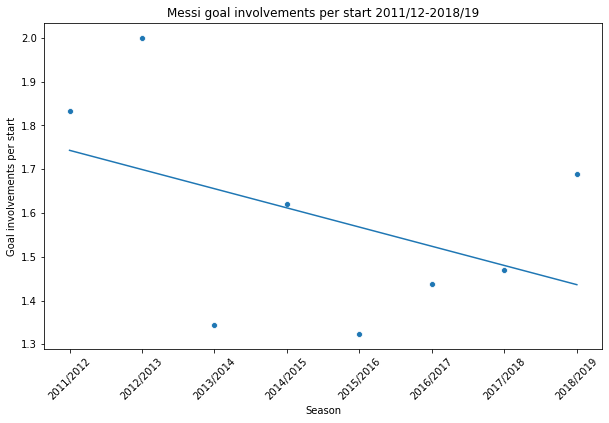

In [60]:
predicted_goal_involvements_per_start_down = results.predict(X_down)
downward_trend_acc = downward_trend_acc.assign(predicted_goal_involvements_per_start = predicted_goal_involvements_per_start_down)

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=downward_trend_acc, x='season', y='involvements_per_start')
sns.lineplot(data=downward_trend_acc, x='season', y='predicted_goal_involvements_per_start')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements per start')
plt.title('Messi goal involvements per start 2011/12-2018/19')

In [61]:
#R-Squared is actually lower - SUPER WEIRD!

# Quadratic regression

In [62]:
season_by_season_output_quad = season_by_season_output.copy()
season_by_season_output_quad

,season,goals,assists,chances_created,chances_missed,goal_involvements,no_of_starts,involvements_per_start
0,2005/2006,6,1,12,32,7,11,0.636364
1,2006/2007,14,2,35,49,16,23,0.695652
2,2007/2008,10,12,28,59,22,23,0.956522
3,2008/2009,23,11,57,88,34,27,1.259259
4,2009/2010,34,10,49,127,44,30,1.466667
5,2010/2011,31,18,49,115,49,31,1.580645
6,2011/2012,50,16,74,148,66,36,1.833333
7,2012/2013,46,10,37,112,56,28,2.000000
8,2013/2014,28,11,60,134,39,29,1.344828
9,2014/2015,43,17,68,143,60,37,1.621622


In [63]:
season_by_season_output_quad = season_by_season_output_quad.assign(t=range(1, len(season_by_season_output_quad)+1))
season_by_season_output_quad = sm.add_constant(season_by_season_output_quad)
season_by_season_output_quad = season_by_season_output_quad.assign(t2 = season_by_season_output_quad['t'] * season_by_season_output_quad ['t'])

In [64]:
y_quad=season_by_season_output_quad['goal_involvements']
X_quad=season_by_season_output_quad[['const', 't', 't2']]
quad_reg = sm.OLS(y_quad,X_quad)
results_quad = quad_reg.fit()
results_quad.summary()

C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      goal_involvements   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     19.77
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           0.000228
Time:                        21:46:49   Log-Likelihood:                -48.045
No. Observations:                  14   AIC:                             102.1
Df Residuals:                      11   BIC:                             104.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7967      7.867     -0.610      0.554     -22.113      12.519
t             12.4790      2.413      5.172      0.000       7.168      17.790
t2            -0.6573      0.156     -4.201      0.001      -1.002      -0.313
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.076
Skew:                          -0.148   Prob(JB):                        0.963
Kurtosis:                       3.205   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
season_by_season_output_quad = season_by_season_output_quad.assign(predicted_season_by_season_output_quad = results_quad.predict(season_by_season_output_quad[['const', 't', 't2']]))

In [66]:
season_by_season_output_quad.head()

,const,season,goals,assists,chances_created,chances_missed,goal_involvements,no_of_starts,involvements_per_start,t,t2,predicted_season_by_season_output_quad
0,1.0,2005/2006,6,1,12,32,7,11,0.636364,1,1,7.025000
1,1.0,2006/2007,14,2,35,49,16,23,0.695652,2,4,17.532143
2,1.0,2007/2008,10,12,28,59,22,23,0.956522,3,9,26.724725
3,1.0,2008/2009,23,11,57,88,34,27,1.259259,4,16,34.602747
4,1.0,2009/2010,34,10,49,127,44,30,1.466667,5,25,41.166209


Text(0.5, 1.0, 'Messi goal involvements 2005/06-2018/19')

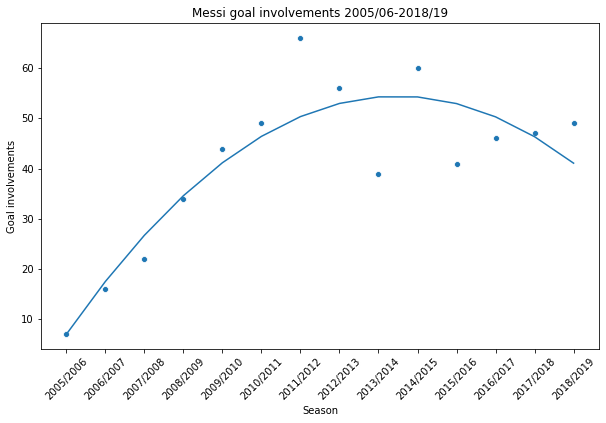

In [67]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=season_by_season_output_quad, x='season', y='goal_involvements')
sns.lineplot(data=season_by_season_output_quad, x='season', y='predicted_season_by_season_output_quad')

plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Goal involvements')
plt.title('Messi goal involvements 2005/06-2018/19')

In [68]:
#Add 'age' column and change x-axis from 'season_name' to 'age' to enable predictions...

In [69]:
#Messi was born 24 June 1987. Handily this falls between football seasons, so we will assign him his age at the start of each season (2005/2006 = 18, 2006/2007 = 19, etc).

In [70]:
messi_age = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [71]:
season_by_season_output_quad = season_by_season_output_quad.assign(age = messi_age)
season_by_season_output_quad

,const,season,goals,assists,chances_created,chances_missed,goal_involvements,no_of_starts,involvements_per_start,t,t2,predicted_season_by_season_output_quad,age
0,1.0,2005/2006,6,1,12,32,7,11,0.636364,1,1,7.025000,18
1,1.0,2006/2007,14,2,35,49,16,23,0.695652,2,4,17.532143,19
2,1.0,2007/2008,10,12,28,59,22,23,0.956522,3,9,26.724725,20
3,1.0,2008/2009,23,11,57,88,34,27,1.259259,4,16,34.602747,21
4,1.0,2009/2010,34,10,49,127,44,30,1.466667,5,25,41.166209,22
5,1.0,2010/2011,31,18,49,115,49,31,1.580645,6,36,46.415110,23
6,1.0,2011/2012,50,16,74,148,66,36,1.833333,7,49,50.349451,24
7,1.0,2012/2013,46,10,37,112,56,28,2.000000,8,64,52.969231,25
8,1.0,2013/2014,28,11,60,134,39,29,1.344828,9,81,54.274451,26
9,1.0,2014/2015,43,17,68,143,60,37,1.621622,10,100,54.265110,27


In [72]:
extend_data = {'season': ['2019/2020', '2020/2021', '2021/2022', '2022/2023', '2023/2024'], 'age': [32, 33, 34, 35, 36]}
extend_df = pd.DataFrame.from_dict(extend_data)
extend_df

,season,age
0,2019/2020,32
1,2020/2021,33
2,2021/2022,34
3,2022/2023,35
4,2023/2024,36


In [73]:
extend_df = extend_df.assign(t=range(15, len(extend_df)+15))
extend_df = sm.add_constant(extend_df)
extend_df = extend_df.assign(t2 = extend_df['t'] * extend_df['t'])
extend_df = extend_df.assign(predicted_output = results_quad.predict(extend_df[['const', 't', 't2']]))

In [74]:
extend_df

,const,season,age,t,t2,predicted_output
0,1.0,2019/2020,32,15,225,34.500000
1,1.0,2020/2021,33,16,256,26.603297
2,1.0,2021/2022,34,17,289,17.392033
3,1.0,2022/2023,35,18,324,6.866209
4,1.0,2023/2024,36,19,361,-4.974176


In [75]:
#extended_output = pd.concat([season_by_season_output_quad, extend_df]).drop(
#    columns=['const', 't', 't2', 'predicted_season_by_season_output_quad']).reset_index(drop=True)
#extended_output

In [76]:
#extended_output = extended_output.assign(t=range(1, len(extended_output)+1))
#extended_output = sm.add_constant(extended_output)
#extended_output = extended_output.assign(t2 = extended_output['t'] * extended_output['t'])
#extended_output = extended_output.assign(predicted_output = results_quad.predict(extended_output[['const', 't', 't2']]))

Text(0.5, 1.0, 'Messi goal involvements 2005/06-2018/19 + future predictions')

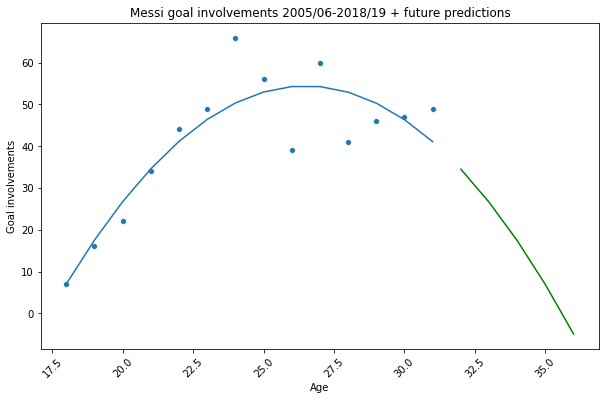

In [77]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data=season_by_season_output_quad, x='age', y='goal_involvements')
sns.lineplot(data=season_by_season_output_quad, x='age', y='predicted_season_by_season_output_quad')
sns.lineplot(data=extend_df, x='age', y='predicted_output', color='green')

plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Goal involvements')
plt.title('Messi goal involvements 2005/06-2018/19 + future predictions')

In [78]:
#Extend downward regression line, compare with actual output in 2019/20, then predict for the following 2 or 3 season.

In [79]:
messi_goal_involvements.groupby('season_name', as_index=False).nunique().reset_index(drop=True)

,season_name,match_id,id,index,period,minute,second,duration,related_events,location,under_pressure,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name,statsbomb_xg,end_location,key_pass_id,technique,outcome,type,body_part,freeze_frame,first_time,aerial_won,deflected,one_on_one,open_goal,redirect
0,2004/2005,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
1,2005/2006,6,7,7,1,6,7,7,7,7,1,1,1,3,3,1,1,2,2,3,3,7,7,4,2,1,1,2,7,1,0,0,0,1,0
2,2006/2007,9,16,16,2,16,14,16,16,16,0,1,1,3,3,1,1,3,3,4,4,16,16,12,3,1,1,3,16,1,0,0,1,1,0
3,2007/2008,14,22,22,2,21,18,22,22,21,1,1,1,6,6,1,1,7,7,5,5,19,22,18,3,1,2,2,18,1,0,0,1,1,0
4,2008/2009,22,34,33,2,28,24,34,34,34,1,1,1,8,8,1,1,5,5,4,4,32,33,22,5,1,3,3,31,1,0,1,1,1,0
5,2009/2010,23,44,44,2,34,33,44,44,44,1,1,1,6,6,1,1,8,8,8,8,44,44,39,4,1,3,3,43,1,1,1,1,1,0
6,2010/2011,26,49,48,2,41,37,49,49,48,1,1,1,8,8,1,1,6,6,8,8,46,46,35,4,1,3,4,45,1,1,1,1,1,0
7,2011/2012,27,66,66,2,51,40,66,66,60,1,1,1,9,9,1,1,9,9,13,13,57,62,45,4,1,3,3,58,1,0,1,1,1,1
8,2012/2013,29,56,56,2,40,37,56,56,56,1,1,1,8,8,1,1,7,7,9,9,53,55,42,3,1,3,2,52,1,0,1,1,1,0
9,2013/2014,22,39,38,2,33,29,39,39,38,1,1,1,7,7,1,1,6,6,5,5,34,39,29,4,1,3,3,34,1,0,0,1,1,0


The model predicted that Messi's goal involvements for the 2019/2020 season would be 34.5, from the table above we can see that they were actually 44. So perhaps he isn't tailing off quite as fast as the model predicts!